<a href="https://colab.research.google.com/github/beezow526/midoribon/blob/main/Chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

%matplotlib inline
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
#Git上からデータをインポート

import urllib.request
from io import StringIO

url = "https://raw.githubusercontent.com/takitsuba/midoribon/master/Chap7/data7.csv"

#csvを読み込む関数
def read_csv(url):
    print(url)
    res = urllib.request.urlopen(url)
    res = res.read().decode("utf-8")
    df = pd.read_csv(StringIO( res) )
    return df

df = read_csv(url)

https://raw.githubusercontent.com/takitsuba/midoribon/master/Chap7/data7.csv


In [3]:
ｄｆ

,N,y,x,id
0,8,0,2,1
1,8,1,2,2
2,8,2,2,3
3,8,4,2,4
4,8,1,2,5
...,...,...,...,...
95,8,7,6,96
96,8,5,6,97
97,8,7,6,98
98,8,2,6,99


In [4]:
df.describe()

,N,y,x,id
count,100.0,100.000000,100.000000,100.000000
mean,8.0,3.810000,4.000000,50.500000
std,0.0,3.070534,1.421338,29.011492
min,8.0,0.000000,2.000000,1.000000
25%,8.0,1.000000,3.000000,25.750000
50%,8.0,3.000000,4.000000,50.500000
75%,8.0,7.000000,5.000000,75.250000
max,8.0,8.000000,6.000000,100.000000


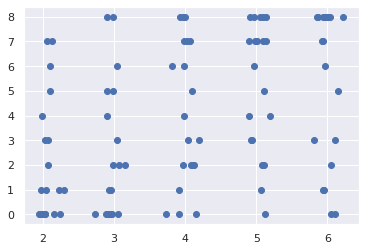

In [6]:
#そのまま散布図にすると点が重なるので、ズレを加える（図７.2みたいに）

df["x_bure"] = np.random.normal(loc=0,scale=0.1,size=100)
#平均0、標準偏差0.1の正規分布に従う乱数
plt.scatter(df["x"]+df["x_bure"],df["y"])

In [8]:
df['ny'] = df['N'] - df['y']  # 発芽能力の無い種子数のカラム ny を追加

In [10]:
#うえのグラフ（データ）に対して、GLMの当て嵌めを行う
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm("y + ny ~ x",data=df,family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            ['y', 'ny']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -322.80
Date:                Mon, 04 Oct 2021   Deviance:                       513.84
Time:                        11:59:14   Pearson chi2:                     428.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1487      0.237     -9.057      0.000      -2.614      -1.684
x              0.5104      0.056      9.179      0.000       0.401       0.619
==============================================================================
"""

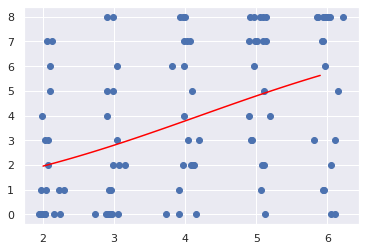

In [11]:
#推定されたパラメーターをを用いて予測
df_test = pd.DataFrame() #ダータフレームを作成
df_test["x"] = np.arange(2,6,0.1) # 2から6の範囲で数値を格納
plt.scatter(df["x"]+df["x_bure"],df["y"])
plt.plot(df_test["x"],model.predict(df_test)*8,color="red")

In [46]:
#改めてデータを確認
#葉数4の時のデータを抽出
df_4 = df.query("x == 4")#.groupby(df["y"]).count()["N"]

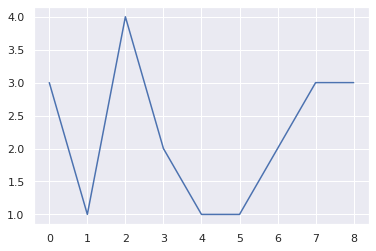

In [33]:
df_4 = pd.DataFrame(df_4)
plt.plot(df_4.index,df_4["N"])

In [49]:
df_4["y"].mean() #葉数4枚の時の平均

4.05

In [51]:
df_4["y"].std()**2 #葉数4枚の時の分散

8.365789473684213